# Energy Efficiency Part 1: Exploration and Unsupervised Learning

In [130]:
#loading libraries
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing as p
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import pairwise_distances 
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, RidgeClassifier, ElasticNet
from sklearn.metrics import mean_squared_error
from mlxtend.plotting import plot_learning_curves
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [3]:
energy_data = pd.read_excel("C:/Users/Sunishka/Desktop/ENB2012_data.xlsx")
energy_data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


This dataset has the records of 768 buildings that have different shapes, surface areas and heights. It has 2 outcome variables - **Heating Load** and **Cooling Load** - that can be predicted using the other 8 features.  

- https://archive.ics.uci.edu/ml/datasets/Energy+efficiency 

In [4]:
energy_data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


### Exploratory Data Analysis

<Axes: >

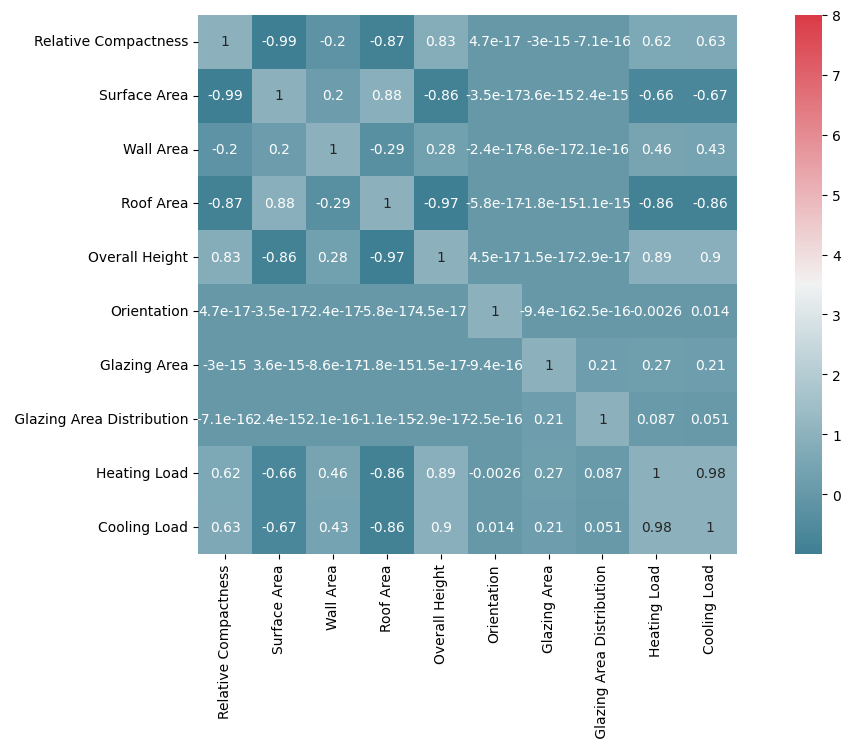

In [5]:
corr = energy_data.corr()
f, ax = plt.subplots(figsize = (15, 7))
sns.heatmap(corr, vmax = 8, annot = True,  cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

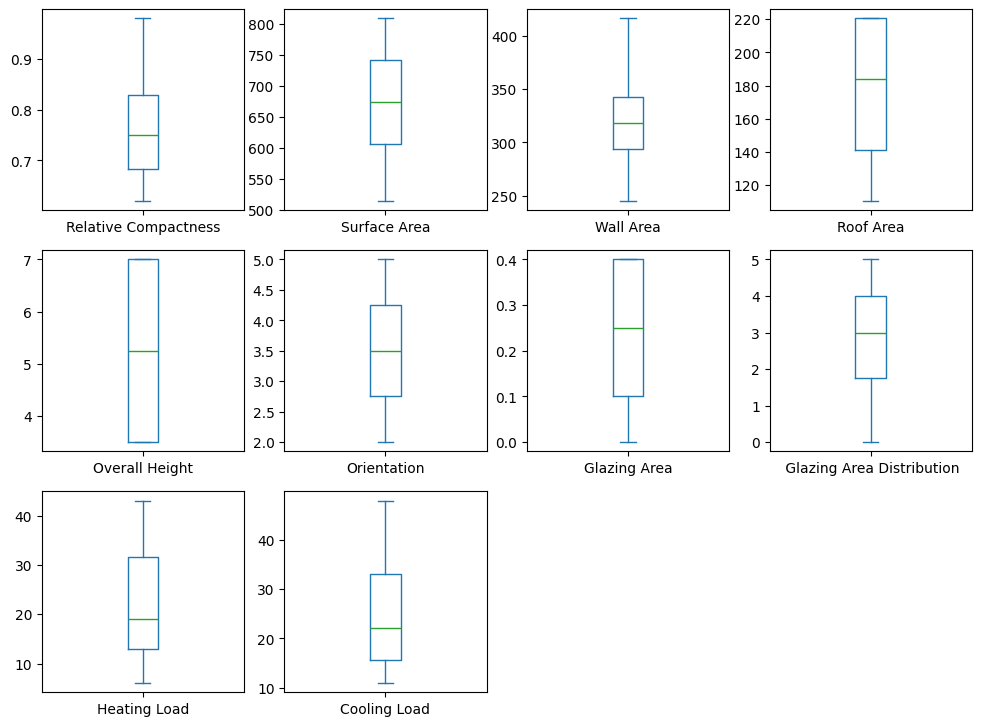

In [6]:
energy_data.plot(kind = 'box', subplots = True, layout = (4, 4), sharex = False, sharey = False, figsize = (12, 12));

all variables look well distributed and devoid of outliers

Text(0.5, 1.0, 'Heating Load - Pairplot')

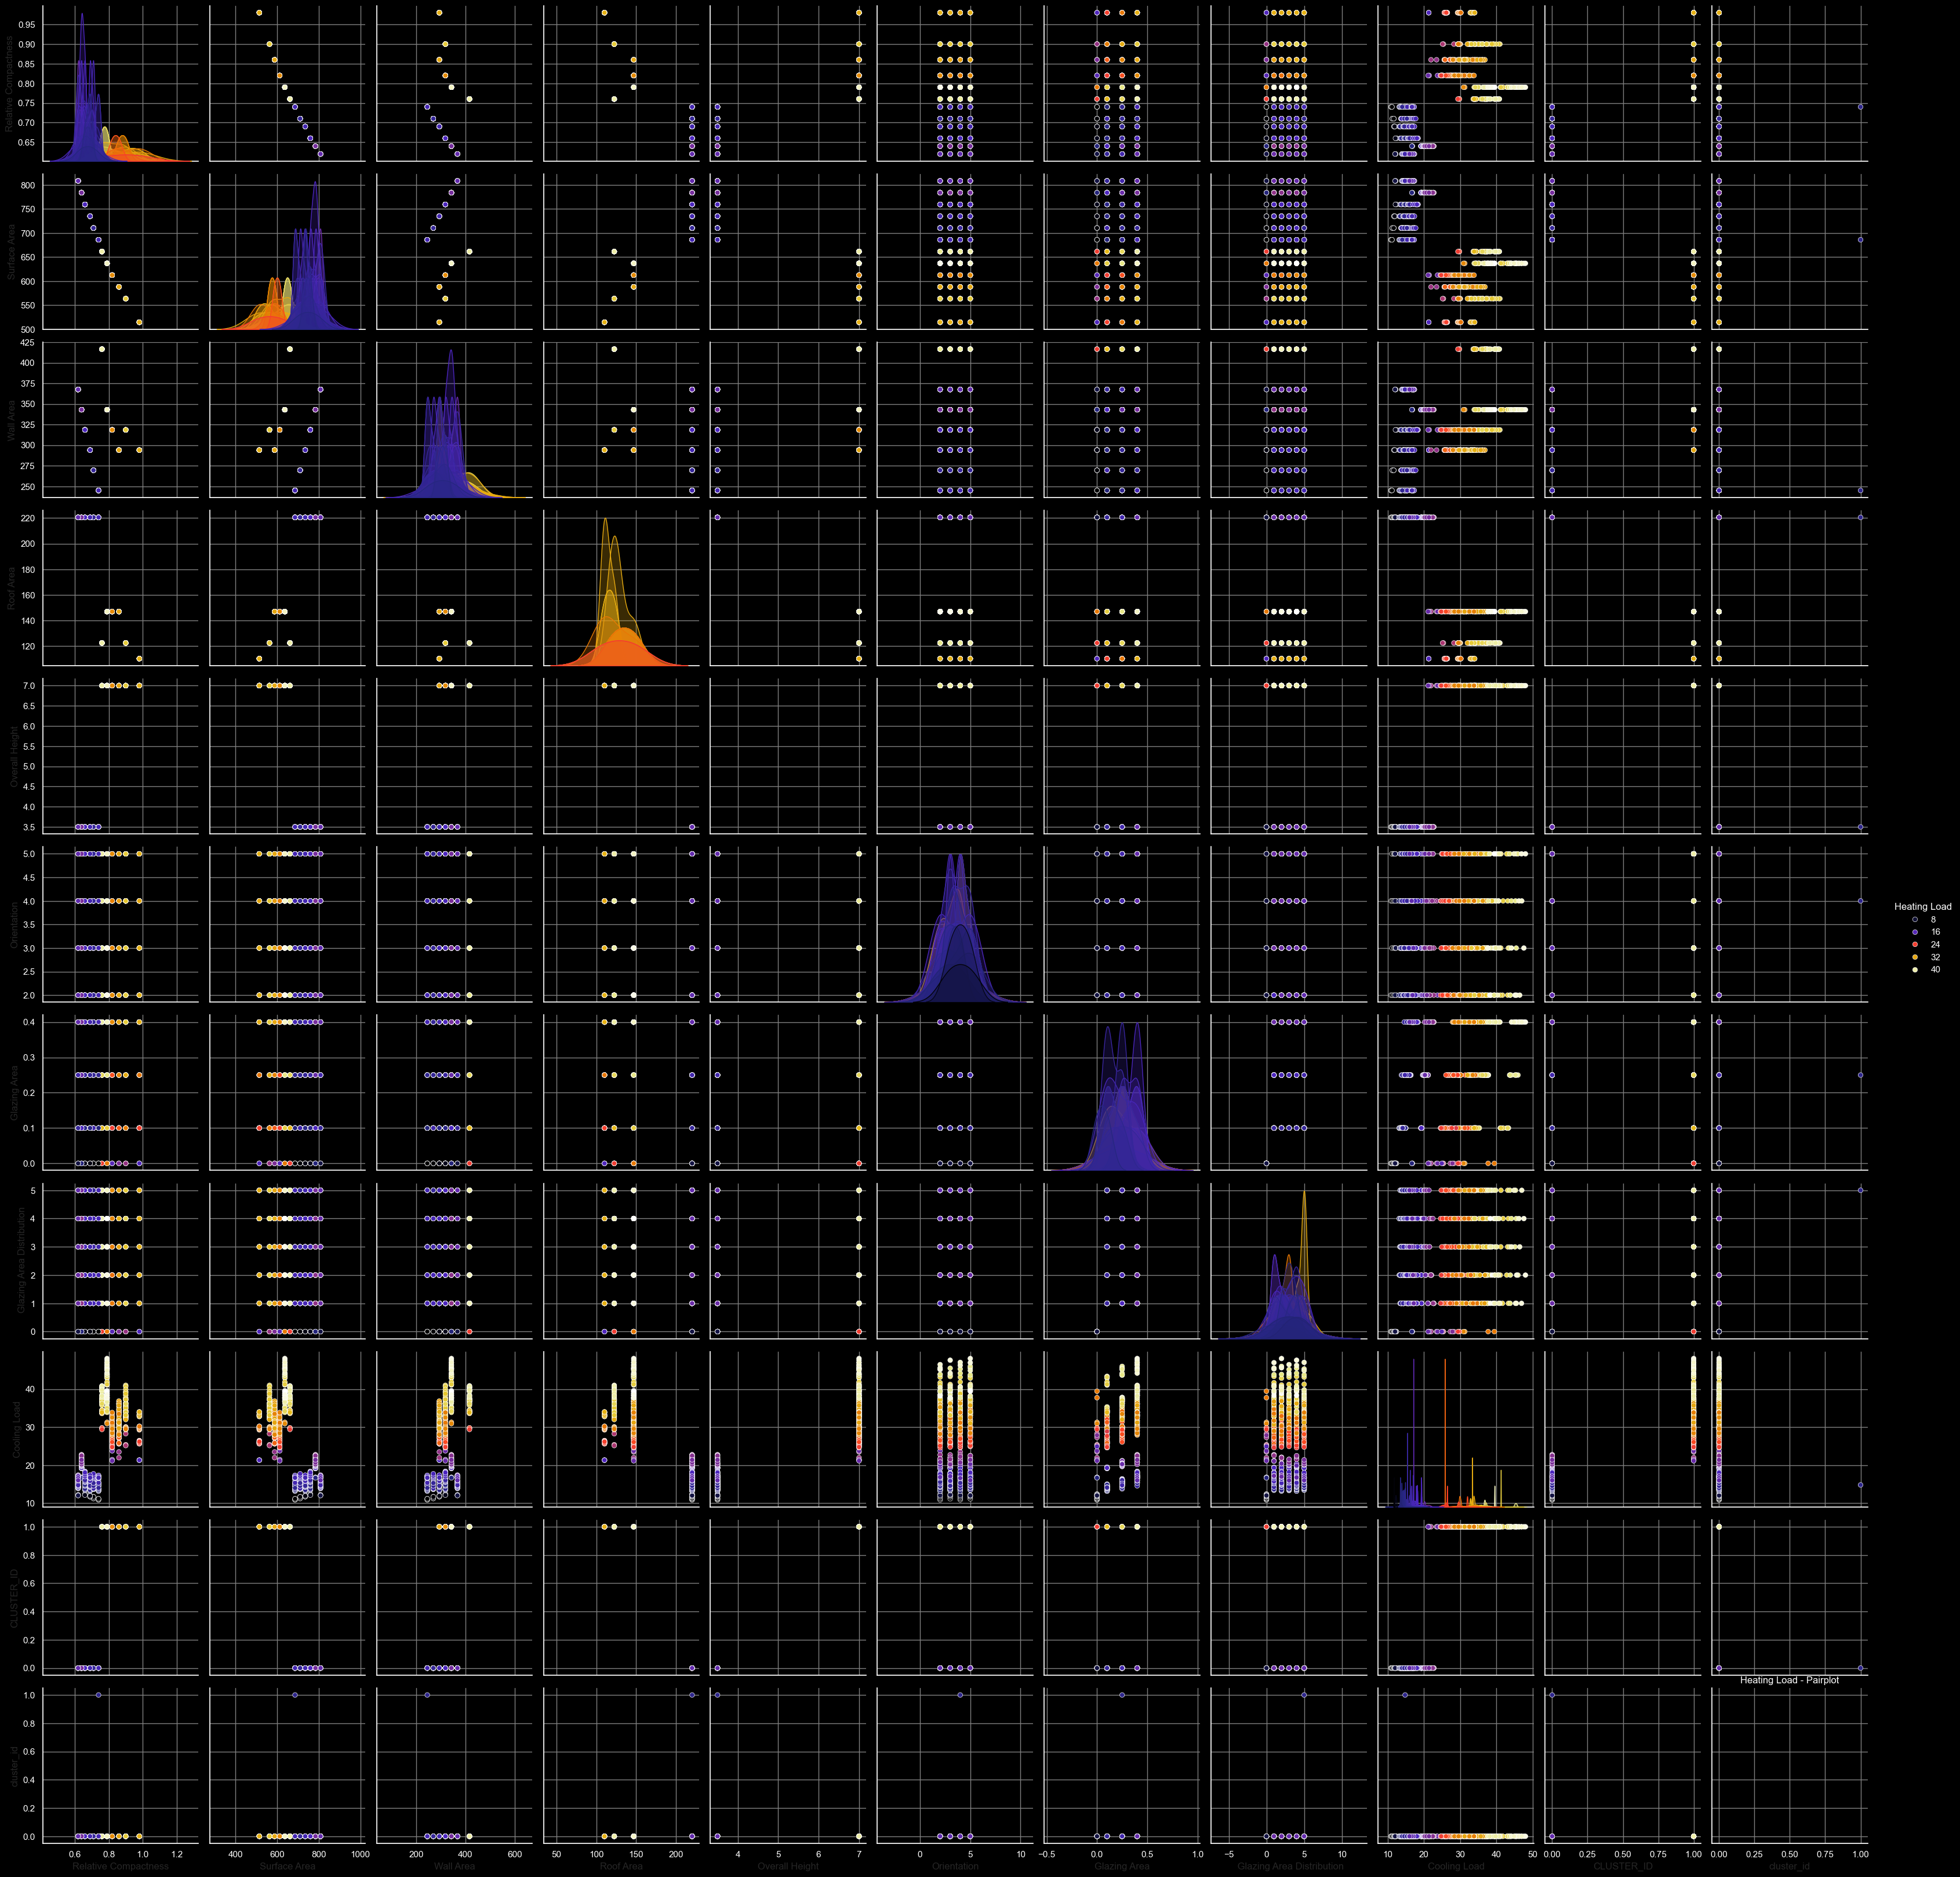

In [136]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black','grid.color':'grey','ytick.labelcolor':'white','xtick.labelcolor':'white','text.color':'white'})
sns.pairplot(energy_data, height=3, hue='Heating Load', palette='CMRmap')
plt.title('Heating Load - Pairplot')

Text(0.5, 1.0, 'Cooling Load - Pairplot')

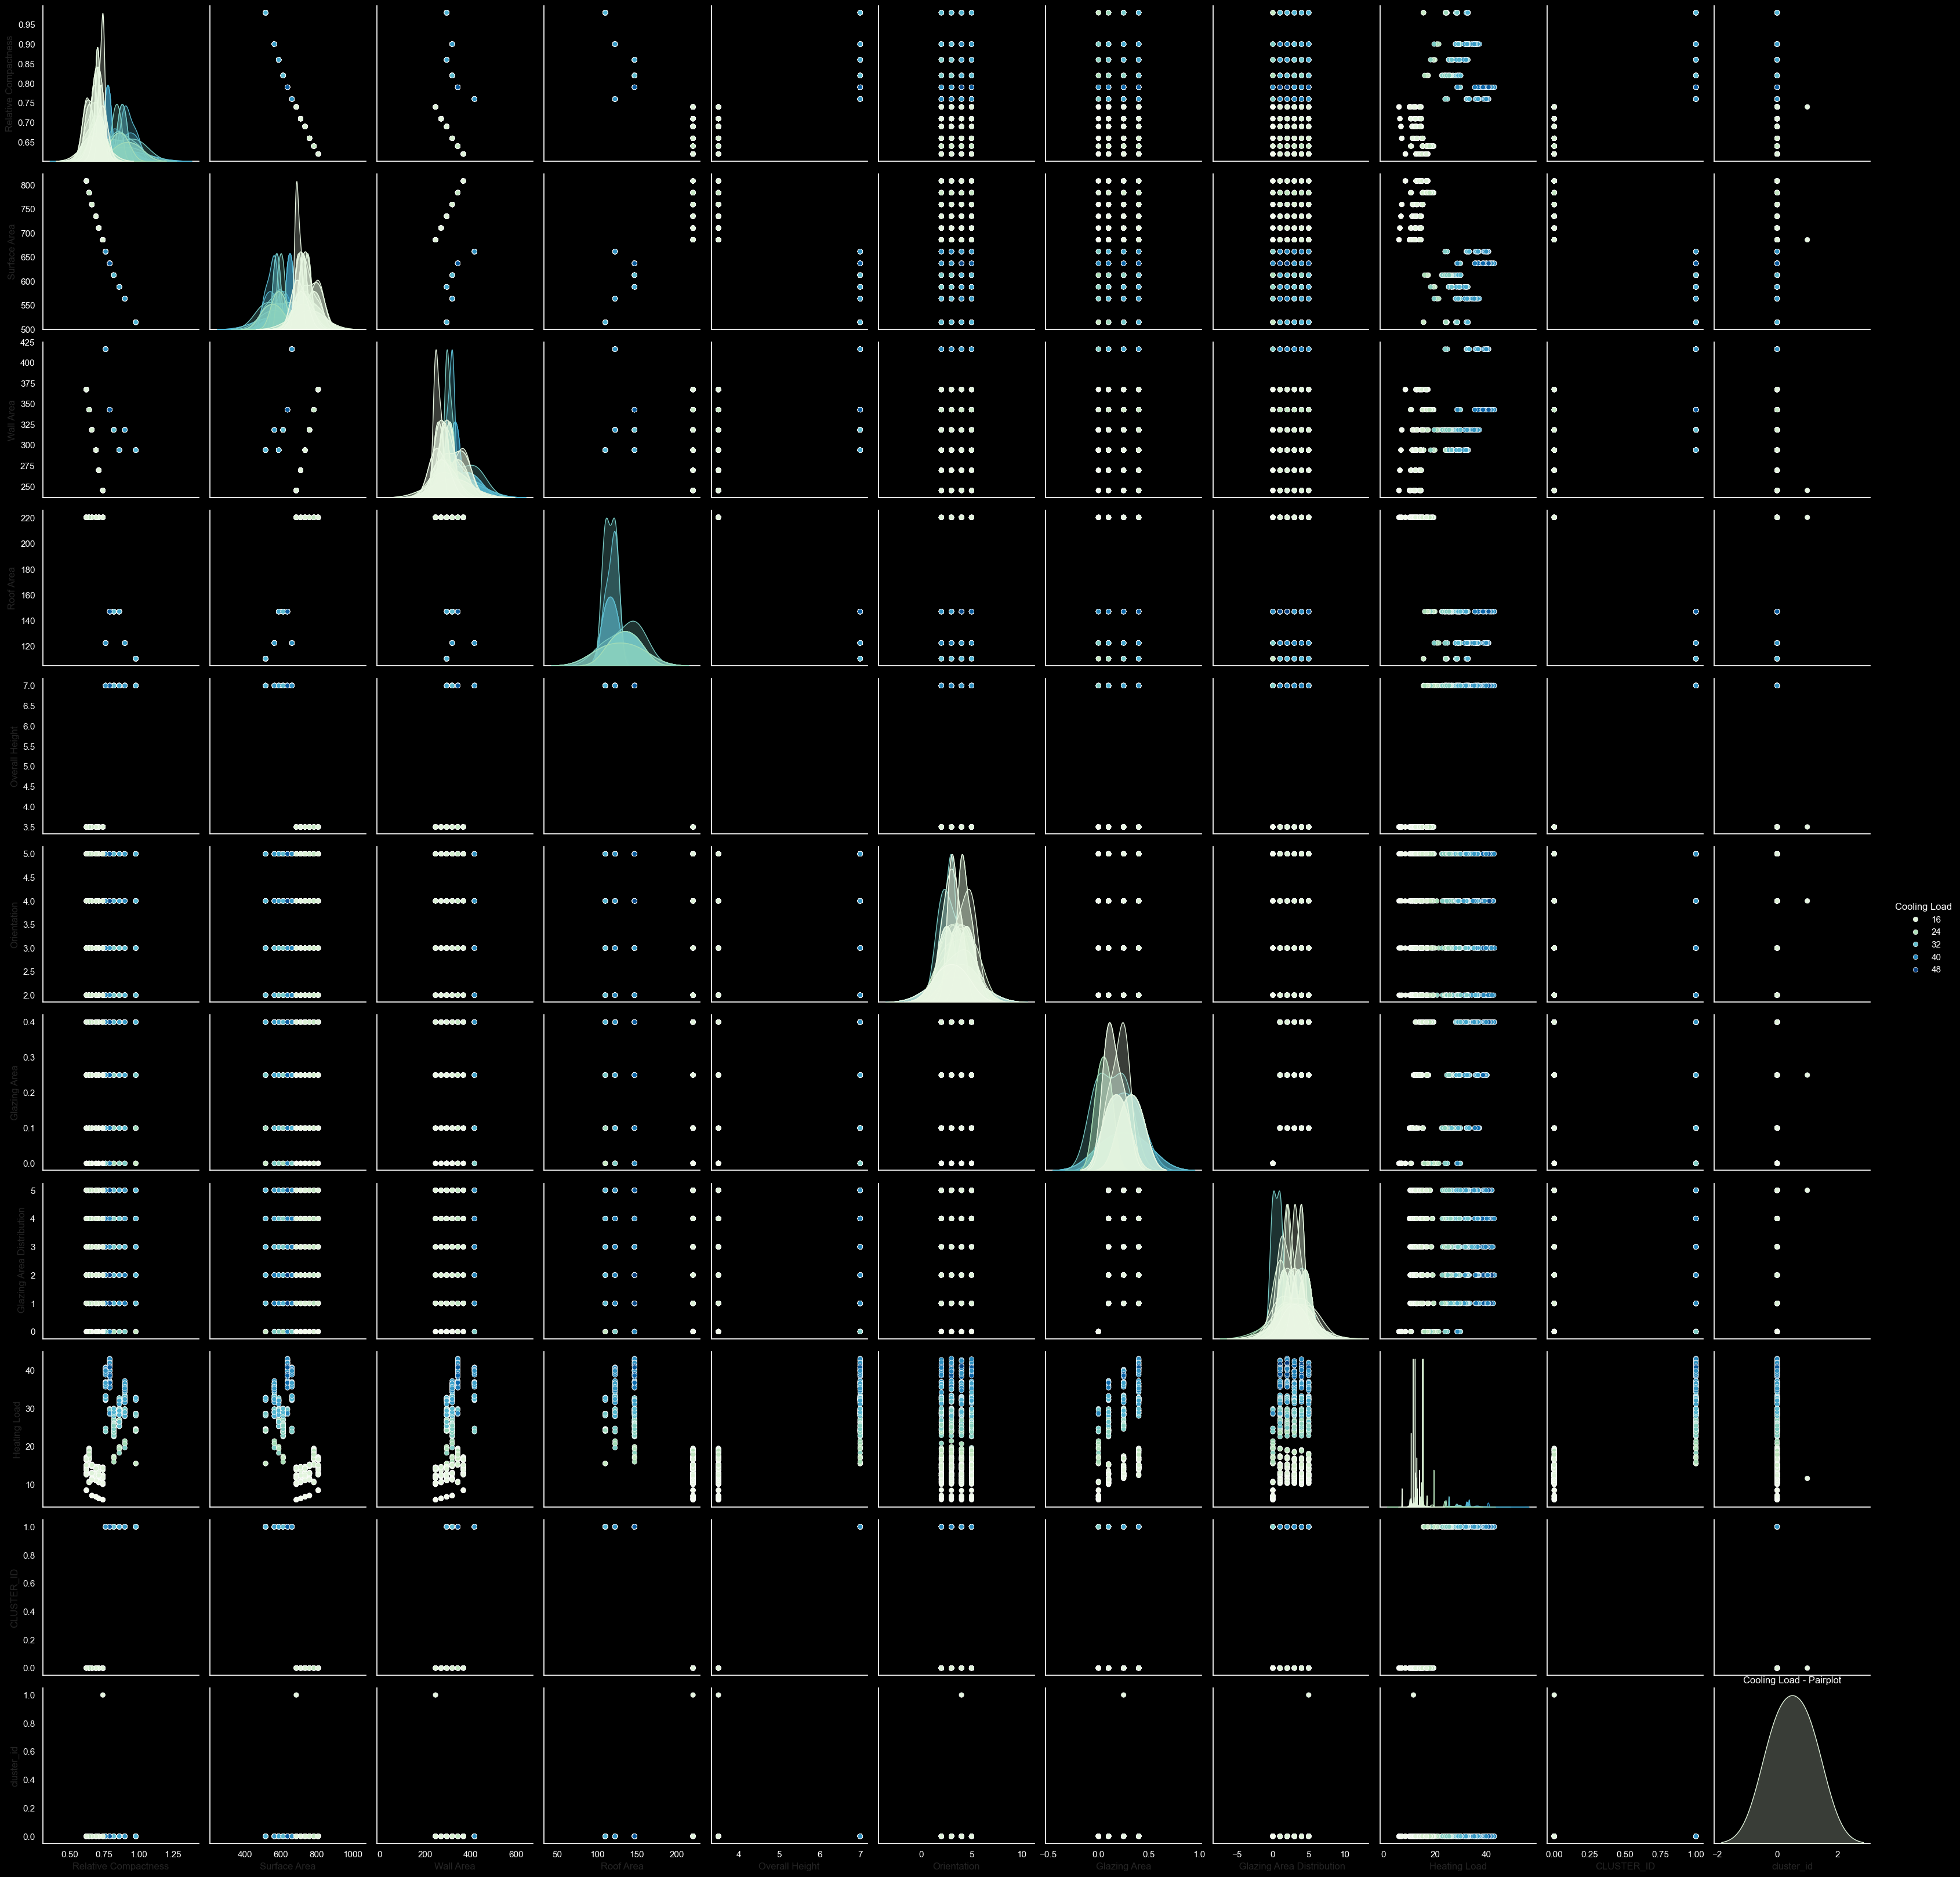

In [137]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black','grid.color':'black','ytick.labelcolor':'white','xtick.labelcolor':'white','text.color':'white'})
sns.pairplot(energy_data, height=3, hue='Cooling Load', palette='GnBu')
plt.title('Cooling Load - Pairplot')

### Unsupervised Learning 

#### Hierarchical Clustering with Unscaled Data

In [13]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black','grid.color':'black','ytick.labelcolor':'white','xtick.labelcolor':'white','text.color':'white'})

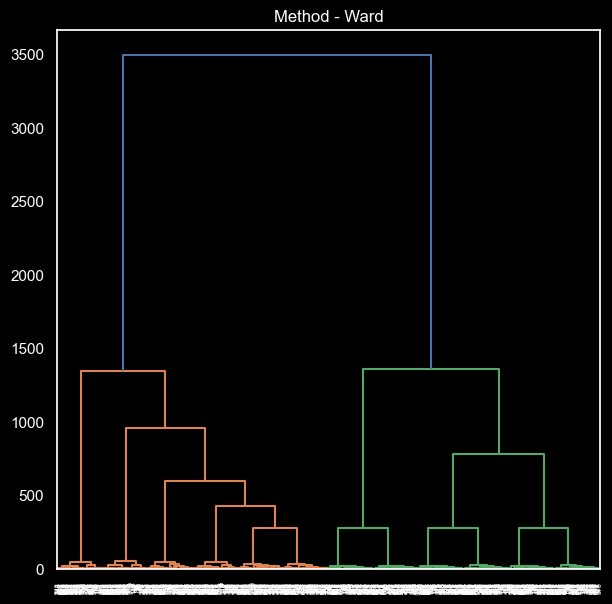

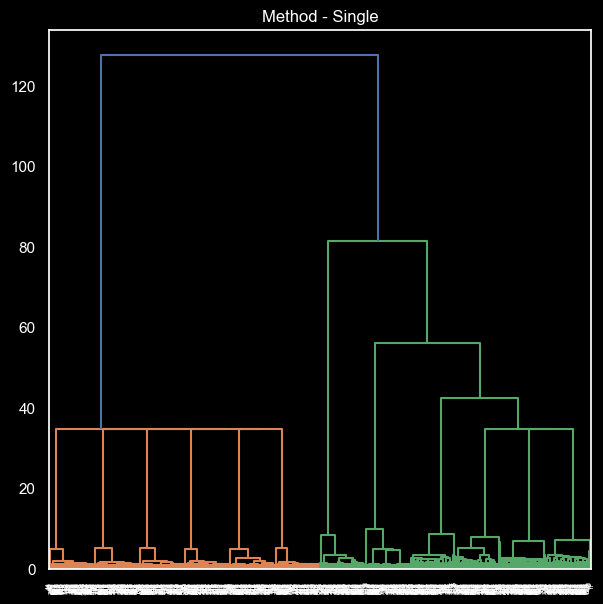

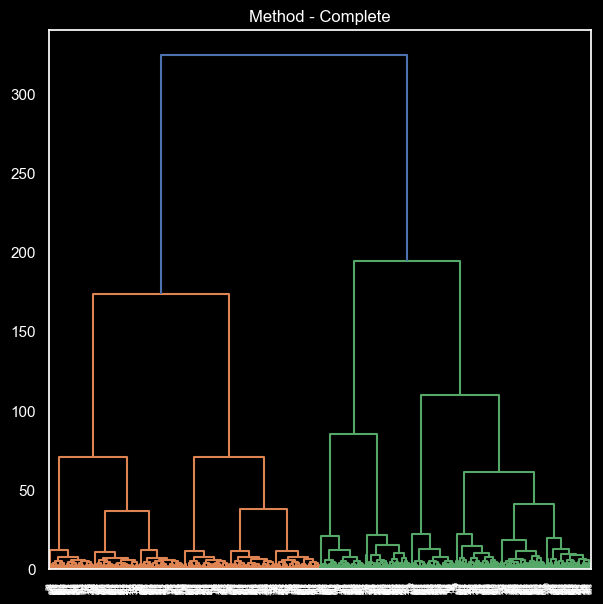

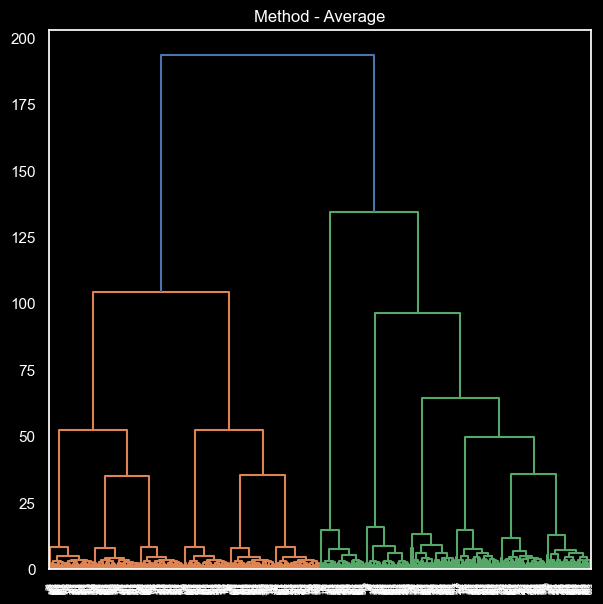

In [15]:
linkage_data = linkage(energy_data, method='ward', metric='euclidean') 
f, ax = plt.subplots(figsize = (7, 7))
dendrogram(linkage_data)
plt.title('Method - Ward')
plt.show()

linkage_data = linkage(energy_data, method='single', metric='euclidean') 
f, ax = plt.subplots(figsize = (7, 7))
dendrogram(linkage_data)
plt.title('Method - Single')
plt.show()

linkage_data = linkage(energy_data, method='complete', metric='euclidean') 
f, ax = plt.subplots(figsize = (7, 7))
dendrogram(linkage_data)
plt.title('Method - Complete')
plt.show()

linkage_data = linkage(energy_data, method='average', metric='euclidean') 
f, ax = plt.subplots(figsize = (7, 7))
dendrogram(linkage_data)
plt.title('Method - Average')
plt.show()

- all linkages show very clear binary clustering
- Single linkage has an imbalanced cluster
- Average and Complete linkages have highly similar dendrograms 
- Ward linkage seems to have the most distinct separation of datapoints at the nodes 

In [151]:
#Checking the silhouette score of Ward Linkage + 2 clusters
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(energy_data)
h_cluster_id = cut_tree(linkage_data, n_clusters=2).reshape(-1, )
h_cluster_id

score = silhouette_score(energy_data, labels, metric='euclidean')
print("Silhouette score with Ward Linkage= {}".format(score))


Silhouette score with Ward Linkage= 0.6149792979862815


In [150]:
#comparing with scaled data 

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(scaled_energy)
h_cluster_id_scaled = cut_tree(linkage_data, n_clusters=2).reshape(-1, )
h_cluster_id_scaled

score = silhouette_score(scaled_energy, labels, metric='euclidean')
print("Silhouette score with Ward Linkage and Scaled Data= {}".format(score))


Silhouette score with Ward Linkage and Scaled Data= 0.5553075325171618


- Both scaled and original energy data has been used for comparing the quality of hierarchical clustering.
- According to the silhouette scores, the performance of ward linkage on the original data is better than the performance with scaled data. 
- This means that the  the clustering model can divide the datapoints with more distinction with the original data compared to the  scaled data. 
- Hierarchical clustering works on distance metrics, but this performance might indicate the original dataset already has a clear relationship between the variables without any scaling required.

In [42]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black','grid.color':'grey','ytick.labelcolor':'white','xtick.labelcolor':'white','text.color':'white'})

Text(0, 0.5, 'Heating Load')

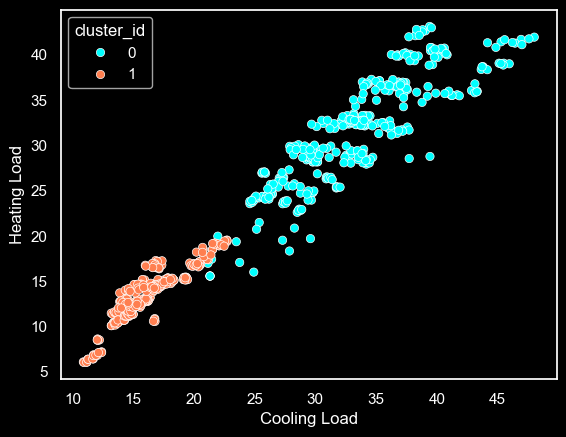

In [152]:
energy_hier_label = energy_data.copy()
energy_hier_label['cluster_id'] = h_cluster_id
energy_hier_label.head()
energy_hier_label.to_csv('nano_clust_label.csv')

# Count number of records in each cluster
energy_hier_label.cluster_id.value_counts()

# Profiling
scatter_plot= sns.scatterplot(x='Cooling Load', y='Heating Load', hue='cluster_id', data=energy_hier_label, palette = {0:'cyan', 1:'coral'}, legend = "full")
scatter_plot.set_xlabel('Cooling Load', color='white')
scatter_plot.set_ylabel('Heating Load', color='white')


- By assigning the hierarchical cluster labels to the actual plot, we can see a clear distinction between buildings that have high heating load and cooling load, and those that have low energy loads for the same. 
- Before profiling the clusters based on this plot, let draw more inferences from another unsupervised method. 

#### K-Means with Scaled Data

In [53]:
#scaling the dataset for Kmeans 
scaler = MinMaxScaler()
scaled_energy = scaler.fit_transform(energy_data)
#converting to df format
scaled_energy = pd.DataFrame(scaled_energy)
scaled_energy.columns = energy_data.columns
scaled_energy.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085


In [147]:
kmeans = KMeans(init='random', n_clusters=2, n_init=10, random_state=0).fit(scaled_energy)
wcss = kmeans.inertia_

print("Within-cluster sum of squares with 3 clusters =", wcss)

Within-cluster sum of squares with 3 clusters = 380.0385787748173


In [56]:
kmeans = KMeans(init='random', n_clusters=2, n_init=10, random_state=0).fit(scaled_energy)
wcss = kmeans.inertia_

print("Within-cluster sum of squares with 2 clusters =", wcss)

Within-cluster sum of squares with 2 clusters = 379.04118294148407


WCSS at K-Iteration 1 is 878.0878369404252
WCSS at K-Iteration 2 is 379.04118294148407
WCSS at K-Iteration 3 is 336.3628329907335
WCSS at K-Iteration 4 is 297.0801332238134
WCSS at K-Iteration 5 is 267.8804673082807
WCSS at K-Iteration 6 is 248.3199272989267
WCSS at K-Iteration 7 is 229.3345483120976
WCSS at K-Iteration 8 is 215.5339707767131
WCSS at K-Iteration 9 is 202.9294368284234


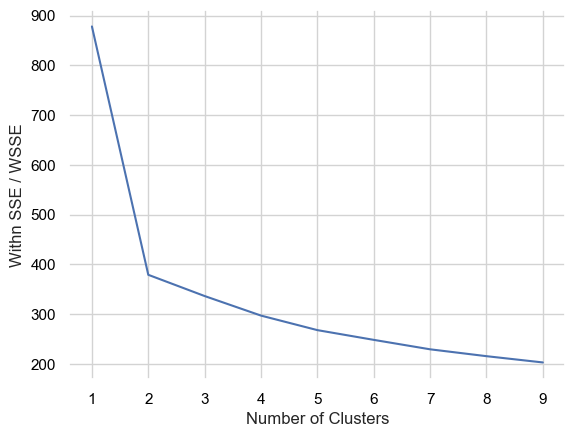

In [59]:
wss = []
for k in range(1, 10):  
    kmeans = KMeans(init='random', n_clusters=k,n_init=10, random_state=0)
    kmeans.fit(scaled_energy)
    wss.append(kmeans.inertia_)
    print("WCSS at K-Iteration",k,"is",kmeans.inertia_)
    #printing iterations
    
#Plotting
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white','grid.color':'lightgrey','ytick.labelcolor':'black','xtick.labelcolor':'black','text.color':'black'})
plt.plot(range(1, 10), wss)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Withn SSE / WSSE")
plt.show()

- the elbow plot also indicates that the best categorization of this dataset can be two clusters

In [60]:
#assigning kmeans cluster ID to original data
kmeans = KMeans(init='random', n_clusters=2, n_init=10, random_state=0).fit(scaled_energy)
l_lab=kmeans.labels_
energy_data["CLUSTER_ID"] = l_lab
energy_data.nunique()

Relative Compactness           12
Surface Area                   12
Wall Area                       7
Roof Area                       4
Overall Height                  2
Orientation                     4
Glazing Area                    4
 Glazing Area Distribution      6
Heating Load                  587
Cooling Load                  636
CLUSTER_ID                      2
dtype: int64

Silhouette score = 0.5553075325171618


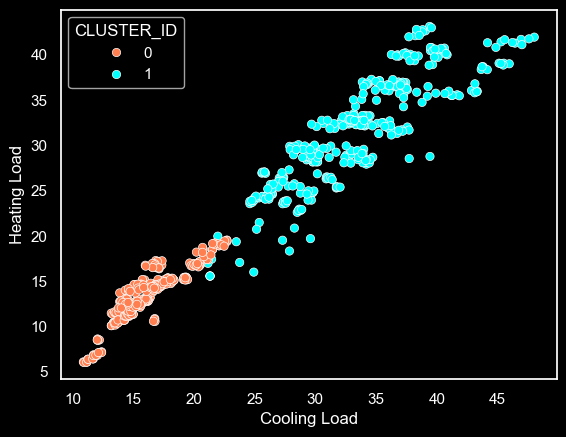

In [148]:
scatter_plot=sns.scatterplot(x='Cooling Load',y='Heating Load', hue='CLUSTER_ID', data=energy_data, palette ={0:'coral', 1:'cyan'}, legend="full")
scatter_plot.set_xlabel('Cooling Load', color='white')
scatter_plot.set_ylabel('Heating Load', color='white')

score = silhouette_score(scaled_energy, l_lab, metric='euclidean')
print("Silhouette score = {}".format(score))

- In this plot, K-means clustering practically mirrors the previous plot with Hierarchical clustering labels
- the silhouette scores for both models with scaled data are also the exact same ( .55 )
- both models indicate a distinct clustering of the datapoints. 

Text(0, 0.5, 'Surface Area')

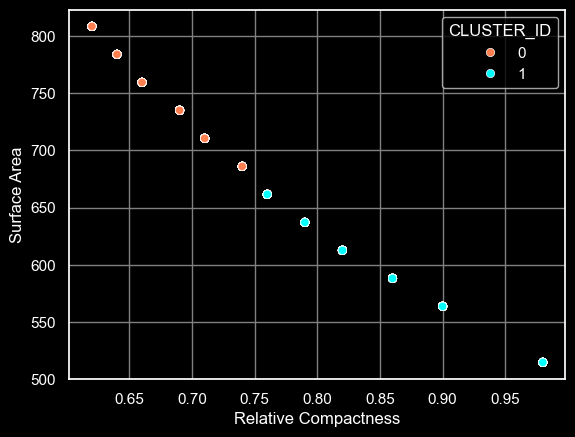

In [70]:
scatter_plot2=sns.scatterplot(x='Relative Compactness',y='Surface Area', hue='CLUSTER_ID', data=energy_data, palette ={0:'coral', 1:'cyan'}, legend="full")
scatter_plot2.set_xlabel('Relative Compactness', color='white')
scatter_plot2.set_ylabel('Surface Area', color='white')

Text(0, 0.5, 'Overall Height')

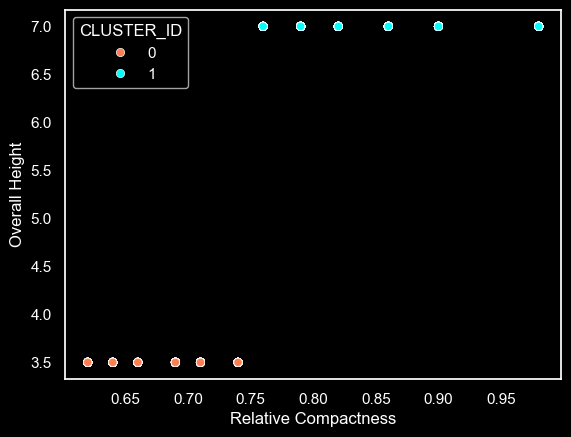

In [154]:
scatter_plot2=sns.scatterplot(x='Relative Compactness',y='Overall Height', hue='CLUSTER_ID', data=energy_data, palette ={0:'coral', 1:'cyan'}, legend="full")
scatter_plot2.set_xlabel('Relative Compactness', color='white')
scatter_plot2.set_ylabel('Overall Height', color='white')

we can infer now that 
- the blue cluster includes buildings with high energy efficiency ( high cooling and heating load, less surface area, good compactness, taller)
- the red cluster includes buildings with low energy efficiency (low cooling and heating load, more surface area, low compactness, signficantly shorter in height)

<Axes: xlabel='CLUSTER_ID'>

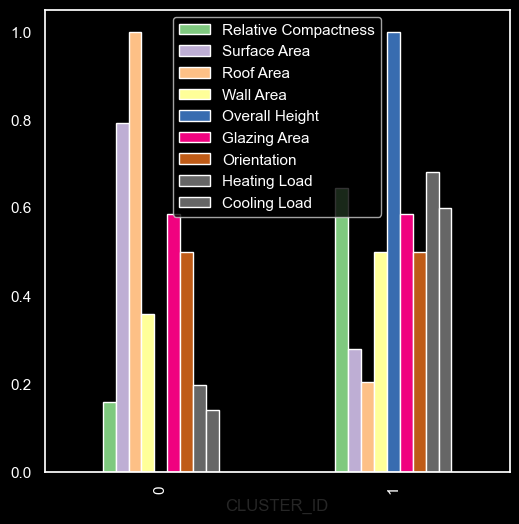

In [153]:
#analysing all features with both clusters
scaled_energy['CLUSTER_ID']=energy_data['CLUSTER_ID']
scaled_energy.groupby('CLUSTER_ID')[['Relative Compactness','Surface Area','Roof Area','Wall Area','Overall Height','Glazing Area','Orientation','Heating Load','Cooling Load']].mean().plot(kind = 'bar',colormap='Accent',figsize=(6,6))

##### Profiling Clusters 
**Cluster 0: Energy Inefficient Buildings**: These buildings are very small in height and wall area, but they have a lot more spread in terms of roof area, surface area. It can be inferred that small buildings with very less compactness have very low heating and cooling loads. <br><br>
**Cluster 1: Energy Efficient Buildings**: They characteristically have high cooling loads, high heating loads, and they are very tall buildings with a lot less spread (roof, surface area) and more relative compactness. 
<br>

##### to note: 
- the overall height seems to be near-zero in cluster 0 because the buildings in this dataset are either very tall or very small (refer to previous scatterplot: Overall Height vs Relative Compactness), they belong to extreme ends of the Overall-Height scale
- the glazing area and orientation of both clusters are practically the same, which may signify that these two features are not particularly important to the prediction of heating and cooling loads / or the classification of energy efficient buildings

#### PCA Visualization with K-Means of K=2

In [155]:
energy_3d = PCA(n_components=3).fit_transform(scaled_energy)

kmeans_pca = KMeans(n_clusters=2, n_init='auto', random_state=3).fit(energy_3d)
wcss_pca = kmeans_pca.inertia_
pca_lab=kmeans_pca.labels_
print("Within-cluster sum of squares =", wcss_pca)
score = silhouette_score(energy_3d, pca_lab, metric='euclidean')
print("Silhouette score = {}".format(score))


Within-cluster sum of squares = 218.36866235206801
Silhouette score = 0.6647570125236323


WSS is a lot lesser, and the Silhouette score is +0.11 better for K-Means after PCA

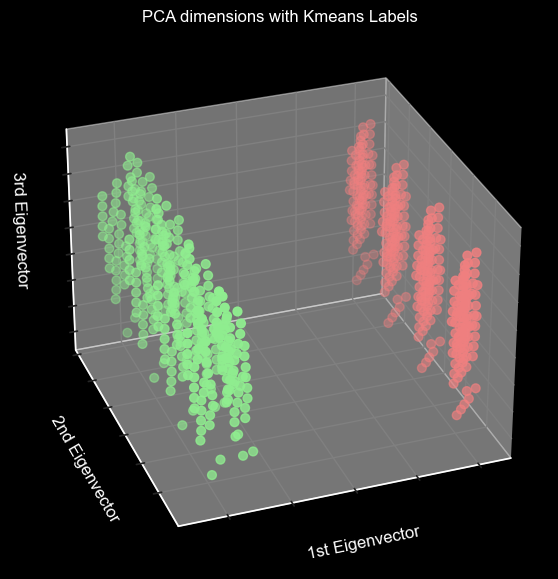

In [121]:
#Visualizing with Cluster Labels 
energy_3d = pd.DataFrame(energy_3d, columns=['PCA_x', 'PCA_y', 'PCA_z'])
energy_3d['labels'] = kmeans_pca.labels_
fig = plt.figure(1, figsize=(7, 7))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(
    xs='PCA_x',
    ys='PCA_y',
    zs='PCA_z',
    c=energy_3d['labels'].map({0: "lightcoral", 1: "lightgreen"}),
    s=40,
    data=energy_3d,
)
ax.set_title("PCA dimensions with Kmeans Labels")
ax.set_xlabel("1st Eigenvector",color='white')
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector",color='white')
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector",color='white')
ax.zaxis.set_ticklabels([])
plt.show()

K-means is clustering distinctly with 3D data as well

#### Attempting Spectral Clustering

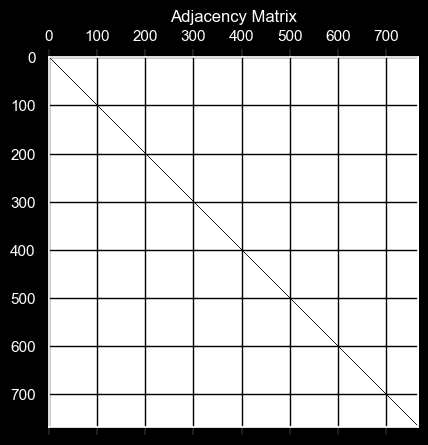

C:\Users\Sunishka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Cooling Load')

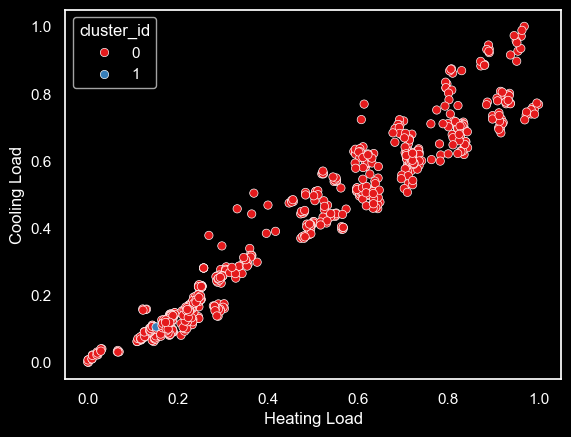

In [156]:
distmat = pairwise_distances(scaled_energy)
A = (distmat < 0.15).astype(int)


plt.spy(A)
plt.title('Adjacency Matrix')
plt.show()

D = np.diag(np.sum(A, axis=1))
L = D - A
lambd, v = np.linalg.eig(L)
idx = lambd.argsort()
v = v[:, idx]

K = 2
v = v[:, 0:K].real
kmeans = KMeans(n_clusters=K).fit(v)
idx = kmeans.labels_
scaled_energy['cluster_id'] = idx
sns.scatterplot(x = "Heating Load" , y = "Cooling Load", hue = 'cluster_id', data = scaled_energy, palette = "Set1", legend = "full")
plt.xlabel('Heating Load', color='white')
plt.ylabel('Cooling Load', color='white')

Spectral clustering cannot cluster this data properly, and there is a huge imbalance of data points between the two clusters. This might have occured because the dataset is not a high-dimensional or sparse one; neither is it geometrically complex. This displays one of the limitations of spectral clustering i.e., overlapping estimations of datapoints assigned to different clusters

# Energy Efficiency Part 2: Supervised Learning

[-6.06014524e+01 -8.60275535e+11  8.60275535e+11  1.72055107e+12
  4.14900684e+00 -2.75384188e-02  1.98190960e+01  2.82388747e-01]
77.7438140139066
R-squared Linear for Heating Load =  0.9162092729117798


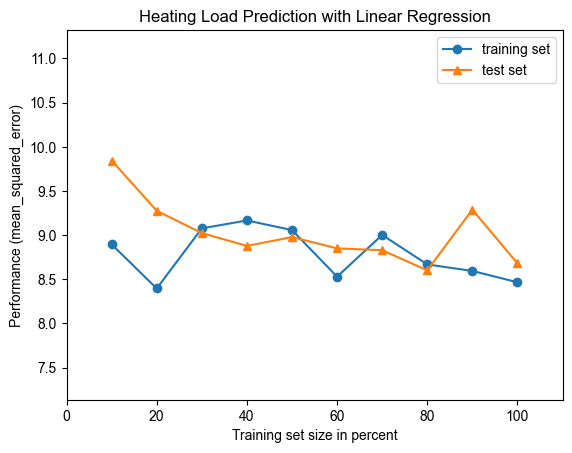

[-6.20019194e+01 -1.31207610e+12  1.31207610e+12  2.62415219e+12
  4.32137108e+00  1.40670985e-01  1.40814137e+01  7.70973563e-02]
83.04267751995529
R-squared Linear for Cooling Load =  0.8912479256349322


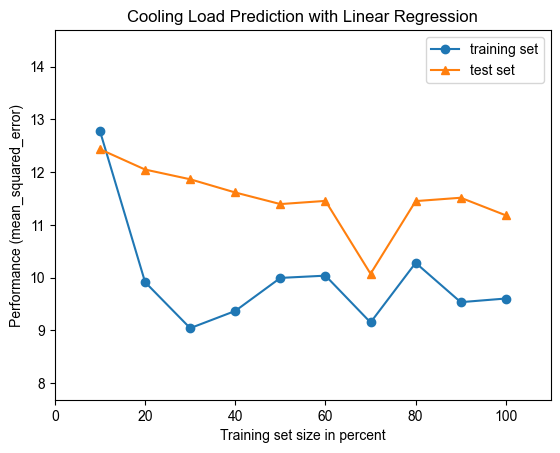

In [120]:
energy_features = energy_data.iloc[:,0:8] # Independent variables
energy_heating = energy_data['Heating Load'] # Outcome variable 1
energy_cooling = energy_data['Cooling Load'] # Outcome variable 2

Xh_train, Xh_test, yh_train, yh_test = train_test_split(energy_features, energy_heating, test_size = 0.30, random_state = 7)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(energy_features, energy_cooling, test_size = 0.30, random_state = 7)

LINregressor = LinearRegression()
LINRegmodel = LINregressor.fit(Xh_train, yh_train)
LINRegpreds = LINRegmodel.predict(Xh_test)
mean_squared_error(yh_test, LINRegpreds)
print(LINRegmodel.coef_)
print(LINRegmodel.intercept_)
r_sq_lr = LINRegmodel.score(Xh_train, yh_train)
print("R-squared Linear for Heating Load = ", r_sq_lr)
plot_learning_curves(X_train=Xh_train,y_train=yh_train,X_test=Xh_test,y_test=yh_test,clf=LINregressor,scoring="mean_squared_error",print_model=False)
plt.title('Heating Load Prediction with Linear Regression')
plt.show()

LINregressor = LinearRegression()
LINRegmodel = LINregressor.fit(Xc_train, yc_train)
LINRegpreds = LINRegmodel.predict(Xc_test)
mean_squared_error(yc_test, LINRegpreds)
print(LINRegmodel.coef_)
print(LINRegmodel.intercept_)
r_sq_lr = LINRegmodel.score(Xc_train, yc_train)
print("R-squared Linear for Cooling Load = ", r_sq_lr)
plot_learning_curves(X_train=Xc_train,y_train=yc_train,X_test=Xc_test,y_test=yc_test,clf=LINregressor,scoring="mean_squared_error",print_model=False)
plt.title('Cooling Load Prediction with Linear Regression')
plt.show()



R-squared Ridge for Heating Load =  0.8449488840797459


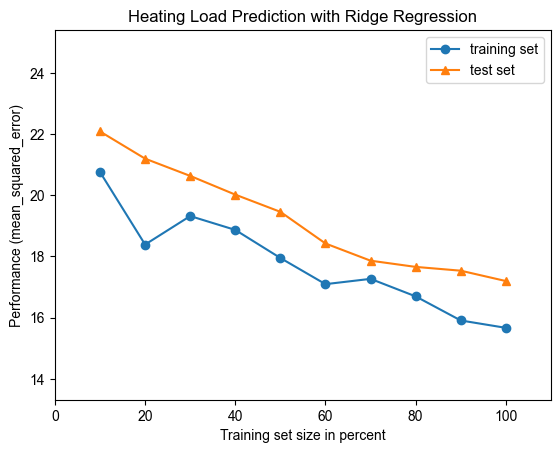

R-squared Ridge for Cooling Load =  0.8387080281923225


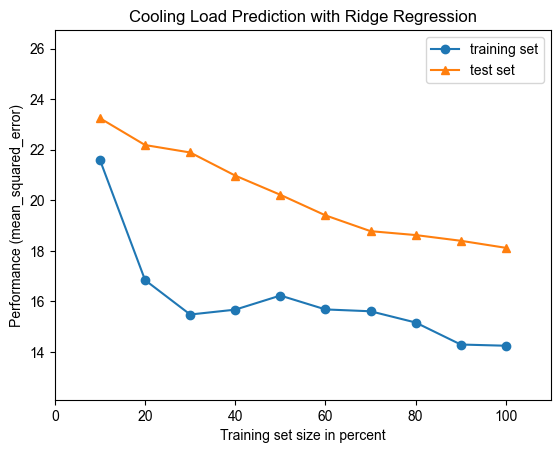

In [118]:
RIDGEregressor = Ridge(alpha=100)
RIDGERegmodel = RIDGEregressor.fit(Xh_train, yh_train)
RIDGERegpreds = RIDGERegmodel.predict(Xh_test)
mean_squared_error(yh_test, RIDGERegpreds)
RIDGERegmodel.coef_
RIDGERegmodel.intercept_
r_sq_rr = RIDGERegmodel.score(Xh_train, yh_train)
print("R-squared Ridge for Heating Load = ", r_sq_rr)
plot_learning_curves(X_train=Xh_train,y_train=yh_train,X_test=Xh_test,y_test=yh_test,clf=RIDGEregressor,scoring="mean_squared_error",print_model=False)
plt.title('Heating Load Prediction with Ridge Regression')
plt.show()

RIDGEregressor = Ridge(alpha=100)
RIDGERegmodel = RIDGEregressor.fit(Xc_train, yc_train)
RIDGERegpreds = RIDGERegmodel.predict(Xc_test)
mean_squared_error(yc_test, RIDGERegpreds)
RIDGERegmodel.coef_
RIDGERegmodel.intercept_
r_sq_rr = RIDGERegmodel.score(Xc_train, yc_train)
print("R-squared Ridge for Cooling Load = ", r_sq_rr)
plot_learning_curves(X_train=Xc_train,y_train=yc_train,X_test=Xc_test,y_test=yc_test,clf=RIDGEregressor,scoring="mean_squared_error",print_model=False)
plt.title('Cooling Load Prediction with Ridge Regression')
plt.show()

R-squared Lasso for Heating Load =  0.912495545705631


C:\Users\Sunishka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.792e+01, tolerance: 1.071e+00
  model = cd_fast.enet_coordinate_descent(


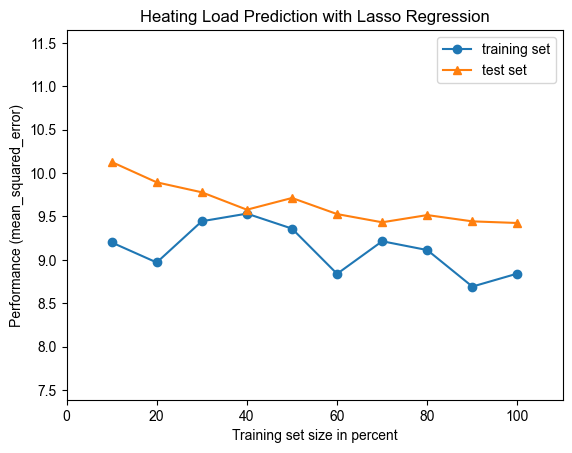

R-squared Lasso for Cooling Load =  0.8860055727910965


C:\Users\Sunishka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.350e+01, tolerance: 9.025e-01
  model = cd_fast.enet_coordinate_descent(


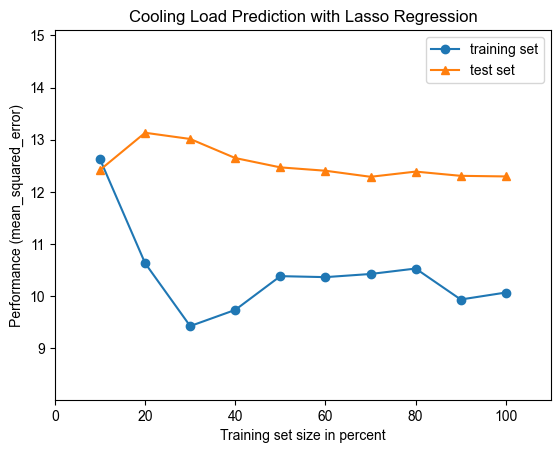

In [119]:
#Heating Load 
LASSOregressor = Lasso(alpha=0.01) # Start with alpha=500, reduce to 50, 10, 3 and see the impact
LASSORegmodel = LASSOregressor.fit(Xh_train, yh_train)
LASSORegpreds = LASSORegmodel.predict(Xh_test)
mean_squared_error(yh_test, LASSORegpreds)
LASSORegmodel.coef_
LASSORegmodel.intercept_
r_sq_lrr = LASSORegmodel.score(Xh_train, yh_train)
print("R-squared Lasso for Heating Load = ", r_sq_lrr)
plot_learning_curves(X_train=Xh_train,y_train=yh_train,X_test=Xh_test,y_test=yh_test,clf=LASSOregressor,scoring="mean_squared_error",print_model=False)
plt.title('Heating Load Prediction with Lasso Regression')
plt.show()

#Cooling Load
LASSOregressor = Lasso(alpha=0.01) # Start with alpha=500, reduce to 50, 10, 3 and see the impact
LASSORegmodel = LASSOregressor.fit(Xc_train, yc_train)
LASSORegpreds = LASSORegmodel.predict(Xc_test)
mean_squared_error(yc_test, LASSORegpreds)
LASSORegmodel.coef_
LASSORegmodel.intercept_
r_sq_lrr = LASSORegmodel.score(Xc_train, yc_train)
print("R-squared Lasso for Cooling Load = ", r_sq_lrr)
plot_learning_curves(X_train=Xc_train,y_train=yc_train,X_test=Xc_test,y_test=yc_test,clf=LASSOregressor,scoring="mean_squared_error",print_model=False)
plt.title('Cooling Load Prediction with Lasso Regression')
plt.show()



Elastic Net R-Squared for Heating Load =  0.8102267999035059
Elastic Net RMSE for Heating Load =  4.51395856086728


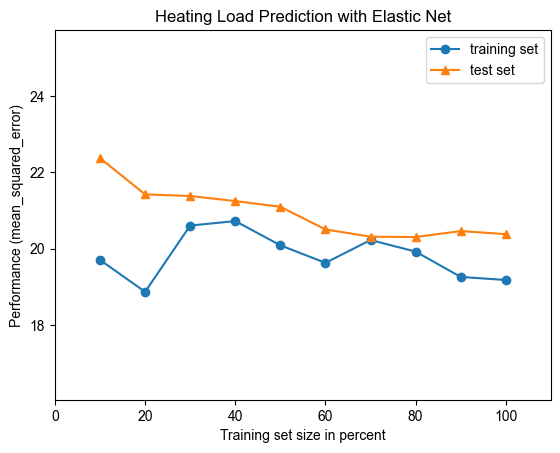

Elastic Net R-Squared for Cooling Load =  0.8033312059609157
Elastic Net RMSE for Cooling Load =  4.619547198726428


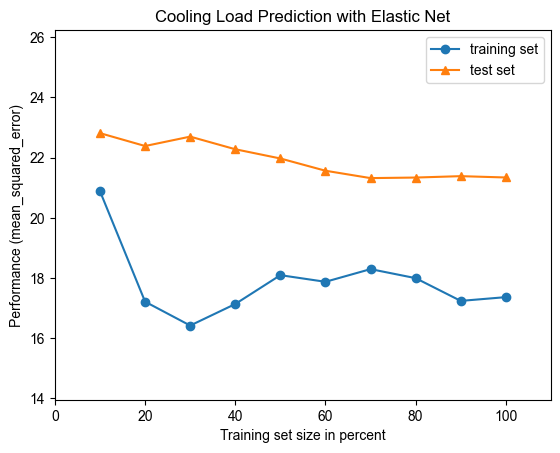

In [124]:
# Elastic Net

#Heating Load
ENregressor = ElasticNet(alpha=1, l1_ratio=0.3)
ENRegmodel = ENregressor.fit(Xh_train, yh_train)
ENRegpreds = ENRegmodel.predict(Xh_test)
mean_squared_error(yh_test, ENRegpreds)
ENRegmodel.coef_
ENRegmodel.intercept_
r_sq_en = ENRegmodel.score(Xh_train, yh_train)
print("Elastic Net R-Squared for Heating Load = ", r_sq_en)
rmse_en = np.sqrt(mean_squared_error(yh_test, ENRegpreds))
print("Elastic Net RMSE for Heating Load = ", rmse_en)
plot_learning_curves(X_train=Xh_train,y_train=yh_train,X_test=Xh_test,y_test=yh_test,clf=ENregressor,scoring="mean_squared_error",print_model=False)
plt.title('Heating Load Prediction with Elastic Net')
plt.show()

#Cooling Load
ENregressor = ElasticNet(alpha=1, l1_ratio=0.3)
ENRegmodel = ENregressor.fit(Xc_train, yc_train)
ENRegpreds = ENRegmodel.predict(Xc_test)
mean_squared_error(yc_test, ENRegpreds)
ENRegmodel.coef_
ENRegmodel.intercept_
r_sq_en = ENRegmodel.score(Xc_train, yc_train)
print("Elastic Net R-Squared for Cooling Load = ", r_sq_en)
rmse_en = np.sqrt(mean_squared_error(yc_test, ENRegpreds))
print("Elastic Net RMSE for Cooling Load = ", rmse_en)
plot_learning_curves(X_train=Xc_train,y_train=yc_train,X_test=Xc_test,y_test=yc_test,clf=ENregressor,scoring="mean_squared_error",print_model=False)
plt.title('Cooling Load Prediction with Elastic Net')
plt.show()

Random Forest R-Squared for Heating Load =  0.9917328126052702
Random Forest RMSE for Heating Load =  1.058209409696706


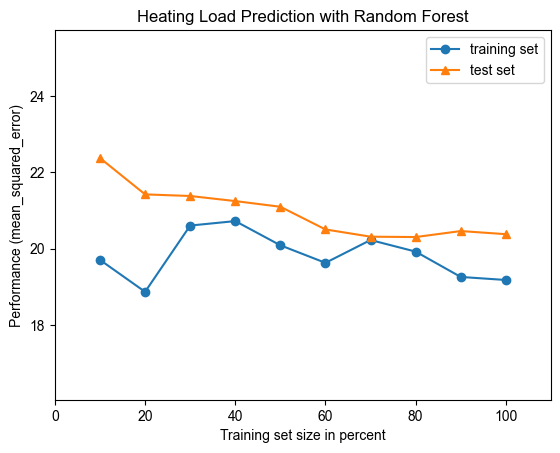

Random Forest R-Squared for Cooling Load =  0.9691286171478213
Random Forest RMSE for Cooling Load =  1.855183768853901


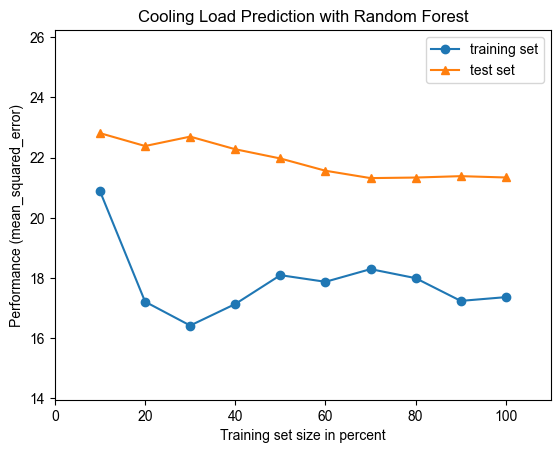

In [123]:
RFregressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=23, oob_score=True)
RFregmodel = RFregressor.fit(Xh_train, yh_train)
RFregpreds = RFregmodel.predict(Xh_test)
mean_squared_error(yh_test, RFregpreds)
r_sq_rfr = RFregmodel.score(Xh_train, yh_train)
print("Random Forest R-Squared for Heating Load = ", r_sq_rfr)
rmse_rfr = np.sqrt(mean_squared_error(yh_test, RFregpreds))
print("Random Forest RMSE for Heating Load = ", rmse_rfr)
plot_learning_curves(X_train=Xh_train,y_train=yh_train,X_test=Xh_test,y_test=yh_test,clf=ENregressor,scoring="mean_squared_error",print_model=False)
plt.title('Heating Load Prediction with Random Forest')
plt.show()


RFregressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=23, oob_score=True)
RFregmodel = RFregressor.fit(Xc_train, yc_train)
RFregpreds = RFregmodel.predict(Xc_test)
mean_squared_error(yc_test, RFregpreds)
r_sq_rfr = RFregmodel.score(Xc_train, yc_train)
print("Random Forest R-Squared for Cooling Load = ", r_sq_rfr)
rmse_rfr = np.sqrt(mean_squared_error(yc_test, RFregpreds))
print("Random Forest RMSE for Cooling Load = ", rmse_rfr)
plot_learning_curves(X_train=Xc_train,y_train=yc_train,X_test=Xc_test,y_test=yc_test,clf=ENregressor,scoring="mean_squared_error",print_model=False)
plt.title('Cooling Load Prediction with Random Forest')
plt.show()

#### Compiling all results

In [134]:
#Generating Final Results for Cooling Load 

models = {
    'Linear Regression': LINRegmodel,
    'Ridge Regression': RIDGERegmodel,
    'Lasso Regression': LASSORegmodel,
    'Random Forest': RFregmodel,
    'Elastic Net': ENRegmodel,
    # Add more models as needed
}

# Create a DataFrame to store the results
results = []
# Evaluate and store results for each model
for model_name, model in models.items():
    # Calculate R-squared
    r_squared = model.score(Xc_test, yc_test)
    
    # Make predictions
    preds = model.predict(Xc_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(yc_test, preds))
    
     # Append results to the list
    results.append({
        'Model': model_name,
        'R-squared': r_squared,
        'RMSE': rmse
    })

# Create a DataFrame from the list
Cooling_df = pd.DataFrame(results)

# Print the results
Cooling_df.head()

,Model,R-squared,RMSE
0,Linear Regression,0.882599,3.343534
1,Ridge Regression,0.809746,4.256354
2,Lasso Regression,0.870891,3.506293
3,Random Forest,0.963856,1.855184
4,Elastic Net,0.775892,4.619547


**Best Models** 
- **Random Forest** 

**Moderate Performance  Models** 
- **Linear Regression** 
- **Ridge Regression** 
- **Lasso Regression** 

**Worst Model**
- **Elastic Net**

In [135]:
#Generating Final Results for Cooling Load 

models = {
    'Linear Regression': LINRegmodel,
    'Ridge Regression': RIDGERegmodel,
    'Lasso Regression': LASSORegmodel,
    'Random Forest': RFregmodel,
    'Elastic Net': ENRegmodel,
    # Add more models as needed
}

# Create a DataFrame to store the results
results = []
# Evaluate and store results for each model
for model_name, model in models.items():
    # Calculate R-squared
    r_squared = model.score(Xh_test, yh_test)
    
    # Make predictions
    preds = model.predict(Xh_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(yh_test, preds))
    
     # Append results to the list
    results.append({
        'Model': model_name,
        'R-squared': r_squared,
        'RMSE': rmse
    })

# Create a DataFrame from the list
Heating_df = pd.DataFrame(results)

# Print the results
Heating_df.head()

,Model,R-squared,RMSE
0,Linear Regression,0.867648,3.693926
1,Ridge Regression,0.794521,4.602641
2,Lasso Regression,0.851525,3.912468
3,Random Forest,0.934786,2.592952
4,Elastic Net,0.764026,4.932369


**Best Models** 
- **Random Forest** 

**Moderate Performance Model** 
- **Linear Regression** 
- **Lasso Regression** 

**Worst Model**
- **Ridge Regression** 
- **Elastic Net**

ACHIEVED BIAS VARIANCE TRADEOFF?